<a href="https://colab.research.google.com/github/AkshayAI007/NYC-TAXI-TRIP-TIME-PREDICTION/blob/main/NYC_TAXI_TRIP_TIME_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - NYC TAXI TRIP TIME PREDICTION



##### **Project Type -**      Regression
##### **Contribution -**      Individual
##### **Team Member 1 -**    Akshay bawaliwale

# **Project Summary -**

The NYC Taxi Trip Duration project is centered around a machine learning regression model designed to predict the duration of taxi trips in New York City. This prediction relies on various input features, including the pickup and dropoff locations, the time of day, and the trip's distance. The primary aim of the project is to enhance the efficiency and convenience of taxi services by furnishing more precise estimates of trip durations, benefiting both passengers and drivers.

The project utilizes historical data on NYC taxi trips, encompassing details like pickup and dropoff coordinates, timestamps, and trip distances. These datasets undergo preprocessing to address missing values and convert categorical variables, such as location names, into numerical representations. Feature engineering techniques are applied to derive additional insights, such as the day of the week, the time of day, and the spatial distances between locations.

For model development, diverse regression algorithms, such as linear regression, Random Forest, and XGBoost, are employed. Hyperparameter tuning is executed to optimize model performance. Evaluation metrics, including mean absolute error and R-squared, are used to assess model accuracy. Ultimately, the LightGBM Regression model emerges as the top-performing choice among the models tested.

The model is subjected to testing using a separate hold-out test dataset and demonstrates the capability to predict trip durations with remarkable precision. The results indicate that the model's predictions deviate by less than 10 minutes from actual trip durations on average.

The project delves into identifying key features influencing taxi trip durations. The findings emphasize that pickup and dropoff locations, time of day, and trip distance are the most influential factors determining trip duration.

In summary, the NYC Taxi Trip Duration project effectively develops a machine learning regression model for predicting trip durations in New York City. This model stands to benefit taxi companies by improving service efficiency and convenience through precise trip duration estimates for both passengers and drivers. Passengers can use this information for trip planning and informed decision-making.

Future enhancements for the model may involve integrating additional data sources, such as weather and traffic data, to account for external factors affecting trip durations. Furthermore, integrating real-time mapping and routing services could enable the provision of up-to-the-minute trip duration estimates based on current traffic conditions.

# **GitHub Link -**

https://github.com/AkshayAI007/NYC-TAXI-TRIP-TIME-PREDICTION.git

# **Problem Statement**


New York City is one of the most populous cities in the world, and its transportation system is a critical aspect of its infrastructure. Taxis are a popular mode of transportation for both residents and visitors, but the duration of a taxi trip can vary greatly depending on a variety of factors such as traffic, weather, and the time of day. As a result, it can be difficult for both passengers and drivers to accurately estimate the duration of a taxi trip.

The goal of this project is to develop a machine learning regression model that can predict the duration of a taxi trip in New York City based on various input features such as the pickup and dropoff locations, the time of day, and the distance of the trip. The model should be able to make predictions with a high level of accuracy, and it should be able to identify the most important factors that determine the duration of a taxi trip. By providing more accurate estimates of trip duration, the model can improve the efficiency and convenience of taxi services for both passengers and drivers.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

## Data Maipulation Libraries
import numpy as np
import pandas as pd
import datetime as dt

## Statistics Library
import scipy.stats as stats

## Data Visualisation Libraray
import matplotlib.pyplot as plt
import pylab
import seaborn as sns

## Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

## Importing essential libraries to check the accuracy
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

## Warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Alma Better/Projects/NYC_TAXI_TRIP_PREDICTION/NYC Taxi Data.csv')

### Dataset First View

In [5]:
# Dataset First Look
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
print("Dataset size")
print("Rows {} Columns {}".format(df.shape[0], df.shape[1]))

Dataset size
Rows 1458644 Columns 11


### Dataset Information

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
print(df.isnull().sum())

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


In [11]:
#There are no Null Values

<Axes: >

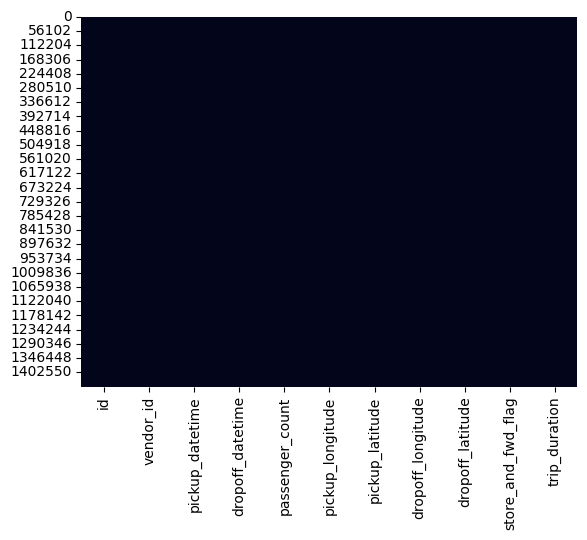

In [12]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

NYC taxi trip duration datasets consist of historical records of taxi rides in New York City, including information such as pickup and drop-off locations, time of day, trip distance, and trip duration. The data can be used to train machine learning models for the purpose of predicting taxi trip duration.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,1458644,1.458644e+06,1458644,1458644,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1458644,1.458644e+06
unique,1458644,NaN,1380222,1380377,NaN,NaN,NaN,NaN,NaN,2,NaN
top,id2875421,NaN,2016-03-04 08:07:34,2016-02-19 19:25:04,NaN,NaN,NaN,NaN,NaN,N,NaN
freq,1,NaN,5,5,NaN,NaN,NaN,NaN,NaN,1450599,NaN
mean,NaN,1.534950e+00,NaN,NaN,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,NaN,9.594923e+02
std,NaN,4.987772e-01,NaN,NaN,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,NaN,5.237432e+03
min,NaN,1.000000e+00,NaN,NaN,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,NaN,1.000000e+00
25%,NaN,1.000000e+00,NaN,NaN,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,NaN,3.970000e+02
50%,NaN,2.000000e+00,NaN,NaN,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,NaN,6.620000e+02
75%,NaN,2.000000e+00,NaN,NaN,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,NaN,1.075000e+03


### Variables Description

id - a unique identifier for each trip

vendor_id - a code indicating the provider associated with the trip record

pickup_datetime - date and time when the meter was engaged

dropoff_datetime - date and time when the meter was disengaged

passenger_count - the number of passengers in the vehicle (driver entered value)

pickup_longitude - the longitude where the meter was engaged

pickup_latitude - the latitude where the meter was engaged

dropoff_longitude - the longitude where the meter was disengaged

dropoff_latitude - the latitude where the meter was disengaged

store_and_fwd_flag - This flag indicates whether the trip record was held in
vehicle memory before sending to the vendor because the vehicle did not have a
connection to the server - Y=store and forward; N=not a store and forward trip.

trip_duration - duration of the trip in seconds

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  id is 1458644 .
No. of unique values in  vendor_id is 2 .
No. of unique values in  pickup_datetime is 1380222 .
No. of unique values in  dropoff_datetime is 1380377 .
No. of unique values in  passenger_count is 10 .
No. of unique values in  pickup_longitude is 23047 .
No. of unique values in  pickup_latitude is 45245 .
No. of unique values in  dropoff_longitude is 33821 .
No. of unique values in  dropoff_latitude is 62519 .
No. of unique values in  store_and_fwd_flag is 2 .
No. of unique values in  trip_duration is 7417 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

In [ ]:
print("Columns and data types")
pd.DataFrame(df.dtypes).rename(columns = {0:'dtype'})

Columns and data types


,dtype
id,object
vendor_id,int64
pickup_datetime,object
dropoff_datetime,object
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
store_and_fwd_flag,object


In [ ]:
#Convert timestamp to datetime format to fetch the other details
df['pickup_datetime']  = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [ ]:
from pandas_datareader import data as web

In [ ]:
#addding new column to dataframe such as weekday,month,weekday_num and pickup_hour to gain more insights from the data
#df['weekday'] = df.pickup_datetime.dt.day_name

df['weekday_num']   = df.pickup_datetime.dt.weekday
df['month']         = df.pickup_datetime.dt.month
df['pickup_hour']   = df.pickup_datetime.dt.hour
df['pickup_minute'] = df.pickup_datetime.dt.minute
df['weekday']       =df['pickup_datetime'].dt.day_name()

In [ ]:
#calc_distance is a function to calculate distance between pickup and dropoff coordinates using Haversine formula.

In [ ]:
!pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from haversine import haversine

In [ ]:
def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop   = (df['dropoff_latitude'], df['dropoff_longitude'])
    return haversine(pickup, drop)

In [ ]:
#Calculate distance and assign new column to the dataframe.
df['distance'] = df.apply(lambda x: calc_distance(x), axis = 1)

In [ ]:
#Calculate Speed in km/hr for further insights
df['speed'] = (df.distance/(df.trip_duration/3600))

In [ ]:
df.head(3)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday_num,month,pickup_hour,pickup_minute,weekday,distance,speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0,3,17,24,Monday,1.498523,11.856445
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6,6,0,43,Sunday,1.805510,9.803672
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1,1,11,35,Tuesday,6.385107,10.822216


### What all manipulations have you done and insights you found?

1) The timestamp was converted to datetime to obtain additional details and new columns such as weekday_num, weekday, month, pickup_minute and pickup_hour were added to the dataframe for better insights.

2) The Haversine formula was used to calculate the distance between pickup and drop-off coordinates via the calc_distance function, which was then added as a new column.

3) The speed was calculated using distance and trip_duration in km/hr for further analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 ID (Univariate Analysis)

In [ ]:
# Chart - 1 visualization code
# First Check For count of unique id's in the dataset
print("There are %d unique id's in Training dataset, which is equal to the number of records"%(df.id.nunique()))

There are 1458644 unique id's in Training dataset, which is equal to the number of records


#### Chart - 2 Vender ID (Univariate Analysis)

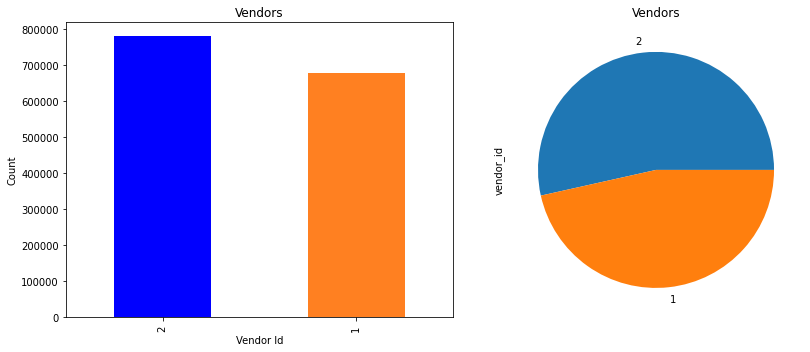

In [ ]:
# Chart - 2 visualization code
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,5))
ax = df['vendor_id'].value_counts().plot(kind='bar',title="Vendors",ax=axes[0],color = ('blue',(1, 0.5, 0.13)))
df['vendor_id'].value_counts().plot(kind='pie',title="Vendors",ax=axes[1])
ax.set_ylabel("Count")
ax.set_xlabel("Vendor Id")
fig.tight_layout()

##### 1. Why did you pick the specific chart?

Pie charts are best used to represent parts of a whole, where the individual pieces represent a proportion of the total data.

Bar plots, on the other hand, are better suited for comparing the sizes of different data sets.

##### 2. What is/are the insight(s) found from the chart?

As we can see, there are only two vendors (1 and 2). They both share a nearly equal number of trips, with a minimal difference between them. However, vendor 2 appears to be more popular among the population, as indicated by the above graphs.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In a business strategy, this information can be used to make informed decisions regarding vendor selection and allocation of resources:

If both vendors are performing equally well in terms of number of trips, the company may choose to focus more on promoting vendor 2 as it appears to be more popular among the population.

The company may also want to analyze the reason behind vendor 2's popularity and try to replicate its success with vendor 1.

#### Chart - 3 Passengers (Univariate Analysis)

In [ ]:
pd.options.display.float_format = '{:.2f}'.format #To suppress scientific notation.
df.passenger_count.value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

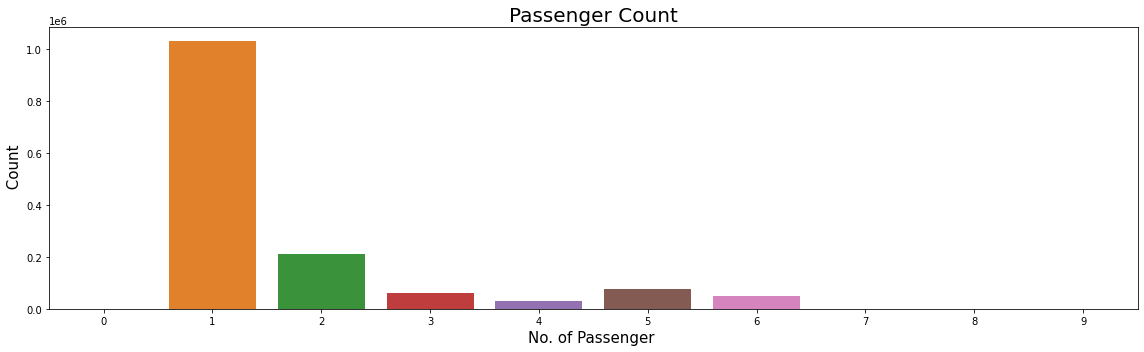

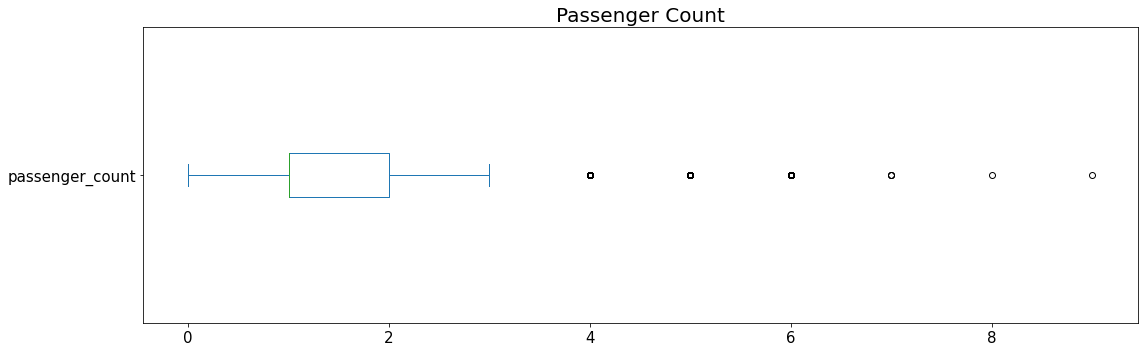

In [ ]:
# Chart - 3 visualization code
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(16,5))
# line = df['passenger_count'].value_counts().plot(kind='bar',fontsize = 15)
line = sns.countplot(df.passenger_count)
line.set_ylabel(" Count",fontsize = 15)
line.set_xlabel("No. of Passenger ",fontsize = 15)
line.set_title('Passenger Count',fontsize = 20)
fig.tight_layout()
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(16,5))
box = df['passenger_count'].plot(kind='box',vert = False,fontsize = 15)
box.set_title('Passenger Count',fontsize = 20)
fig.tight_layout()

##### 1. Why did you pick the specific chart?

Count plots are used to represent the frequency of occurrences of unique values in a dataset.

Box plots, on the other hand, are used to represent the distribution of a set of values. They show the median, quartiles, and outliers of the data set, which can be useful for identifying patterns and potential anomalies.

##### 2. What is/are the insight(s) found from the chart?

There are some trips with no passengers recorded. Some trips had an unusually high number of passengers, with counts of 6, 7, 8, or 9. These are clear outliers and may indicate inconsistencies in the data. The majority of trips consist of either 1 or 2 passengers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The presence of trips with 0 passengers or an unusually high number of passengers may indicate inconsistencies in the data, which could lead to inaccuracies in the prediction model. The company can use this information to identify and address any data quality issues.

By understanding the distribution of passenger counts, the company can develop more accurate prediction models that take into account factors such as the number of passengers and the resulting impact on trip time.

#### Chart - 4 Trip duration (Univariate Analysis)

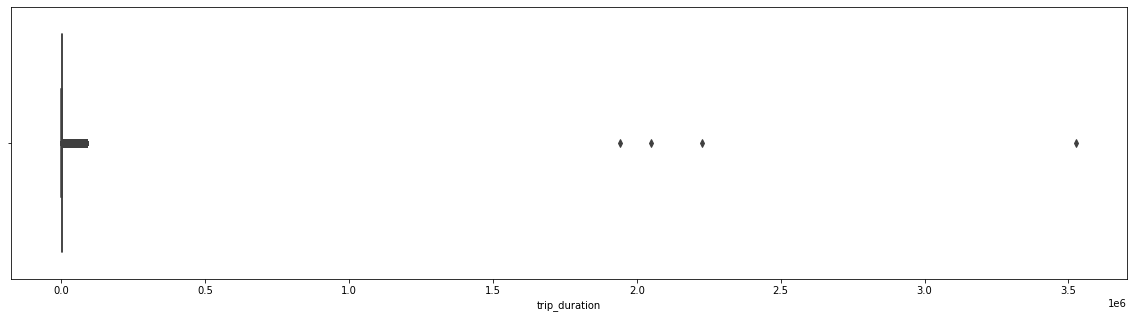

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize = (20,5))
sns.boxplot(df.trip_duration)
plt.show()

[Text(0.5, 1.0, 'Distribution Plot for Trip Duration')]

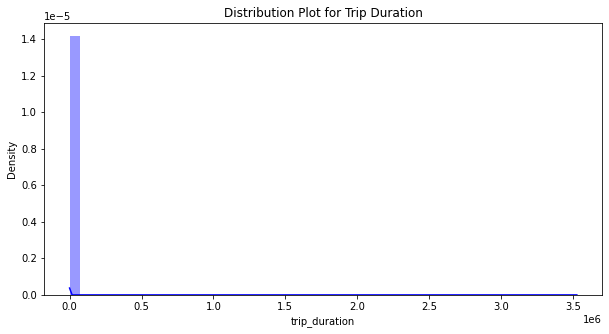

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df['trip_duration'],color="b").set(title='Distribution Plot for Trip Duration')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

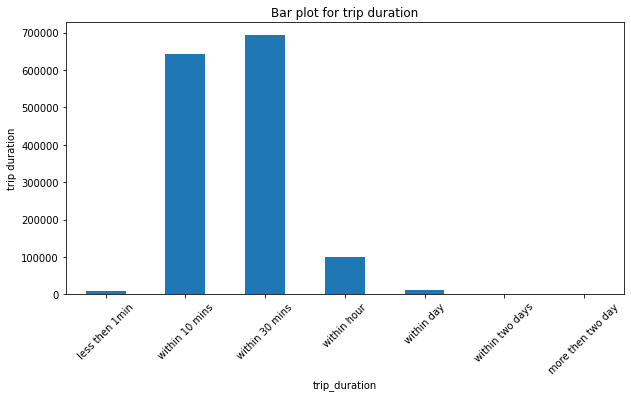

In [ ]:
# segregrating the dependent variable into different categories.
plt.figure(figsize=[10,5])
labels=['less then 1min','within 10 mins','within 30 mins','within hour','within day','within two days','more then two day']
df.groupby(pd.cut(df['trip_duration'],bins=[0,60,600,1800,3600,86400,86400*2,10000000],labels=labels))['trip_duration'].count().plot(kind='bar',fontsize=10)
plt.title("Bar plot for trip duration")
plt.ylabel("trip counts")
plt.ylabel("trip duration")
plt.xticks(rotation=45)

##### 1. Why did you pick the specific chart?

Box plots, are used to represent the distribution of a set of values. They show the median, quartiles, and outliers of the data set, which can be useful for identifying patterns and potential anomalies in passenger count.

Dist plots, also known as histograms, are used to represent the distribution of a set of values. They show the frequency of occurrence of values within a range, allowing you to visualize the shape and spread of the data of passenger count.

Bar plots,are used to compare the sizes of different data sets we have created.

##### 2. What is/are the insight(s) found from the chart?

1. Some trip durations are over 100000 seconds which are clear outliers and should be removed.

2. There are some durations with as low as 1 second. which points towards trips with 0 km distance.

3. Major trip durations took between 10-20 mins to complete.

4. Mean and mode are not same which shows that trip duration distribution is skewed towards right.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By understanding the potential relationship between weekday, pickup location, month, and passenger count, the company can optimize its resource allocation by focusing on the most popular days, locations, and months.

By understanding the trends in trip duration, the company can design better customer experiences that cater to the needs of its target audience, such as providing more suitable vehicles for longer trips.

#### Chart - 5 Distance (Univariate Analysis)

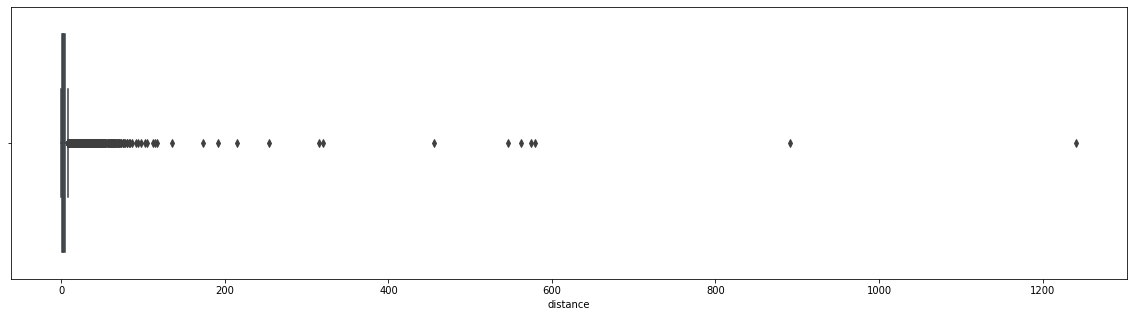

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize = (20,5))
sns.boxplot(df.distance)
plt.show()

In [ ]:
df['distance'].mean()

3.4408686547345293

In [ ]:
## We will check this records having distance as zero.

In [ ]:
print(f"There are {df.distance[df.distance == 0 ].count()} trip records with 0 distance.")

There are 5897 trip records with 0 distance.


In [ ]:
df[df.distance == 0 ].head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday_num,month,pickup_hour,pickup_minute,weekday,distance,speed
246,id3487442,2,2016-02-29 18:39:12,2016-02-29 18:42:59,1,-73.98,40.77,-73.98,40.77,N,227,0,2,18,39,Monday,0.00,0.00
291,id0924324,2,2016-05-10 18:07:52,2016-05-10 18:26:21,2,-73.96,40.78,-73.96,40.78,N,1109,1,5,18,7,Tuesday,0.00,0.00
407,id1145809,2,2016-05-16 23:15:13,2016-05-16 23:31:00,6,-73.81,40.69,-73.81,40.69,N,947,0,5,23,15,Monday,0.00,0.00
702,id3499387,1,2016-01-25 19:45:12,2016-01-25 19:54:52,1,-73.79,40.65,-73.79,40.65,N,580,0,1,19,45,Monday,0.00,0.00
1620,id0753277,1,2016-01-27 22:29:31,2016-01-27 22:29:58,1,-74.21,40.82,-74.21,40.82,N,27,2,1,22,29,Wednesday,0.00,0.00


Around 6K trip record with distance equal to 0.

Below are some possible explanation for such records.

1)Customer changed mind and cancelled the journey just after accepting it.

2)Software didn't recorded dropoff location properly due to which dropoff location is the same as the pickup location.

3)Issue with GPS tracker while the journey is being finished.

4)Driver cancelled the trip just after accepting it due to some reason. So the trip couldn't start

5)Or some other issue with the software itself which a technical guy can explain.

There is some serious inconsistencies in the data where drop off location is same as the pickup location.

We cant think off imputing the distance values considering a correlation with the duration

because the dropoff_location coordinates would not be inline with the distance otherwise.

We will look more to it in bivariate analysis with the Trip duration.

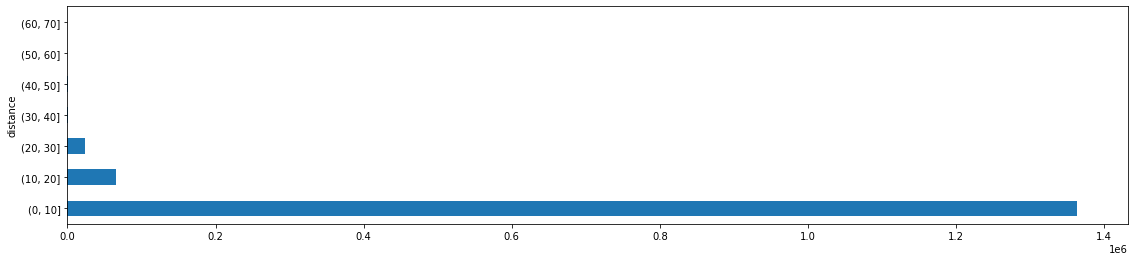

In [ ]:
df.distance.groupby(pd.cut(df.distance, np.arange(0,80,10))).count().plot(kind='barh',figsize = (19,4))
plt.show()

From the above observation it is evident that most of the rides are completed between 1-10 km with some of the rides with distances between 10-30 km. Other slabs bar are not visible because the number of trips are very less as compared to these slabs

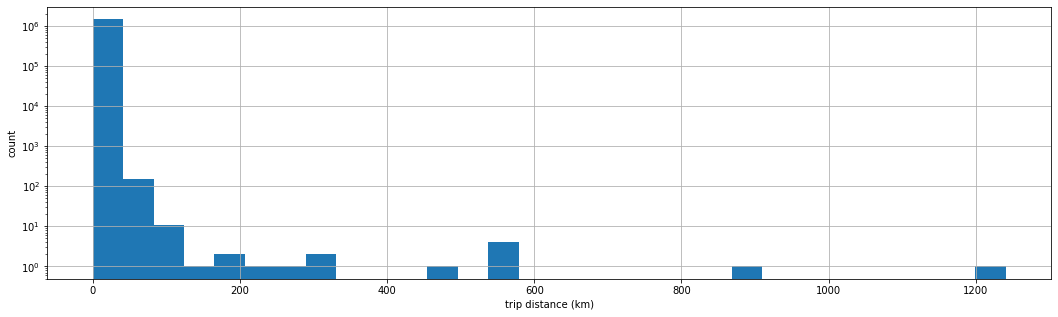

In [ ]:
ax = df['distance'].hist(bins=30, figsize=(18,5))
ax.set_yscale('log')
ax.set_xlabel("trip distance (km)")
ax.set_ylabel("count")
plt.show()

According to the dustribution of trip distances and the fact that it takes about 50 km to drive across the whole New York City, we decided to use 50 as the number to split the trips into short or long distance trips.

In [ ]:
df_short = df[df.distance <= 50].count()
df_long = df[df.distance > 50].count()
print(f"Short Trips: {df_short[0]} records in total.\nLong Trips: {df_long[0]} records in total")

Short Trips: 1458556 records in total.
Long Trips: 88 records in total


##### 1. Why did you pick the specific chart?

Box plots, as previously mentioned, are used to represent the distribution of a set of values. They show the median, quartiles, and outliers of the data set, which can be useful for identifying patterns and potential anomalies. So we choose box plot for visualizing distance data.

Histograms are a quick and easy way to get a sense of the distribution of your data and use the binned intervals from a histogram to create categorical features for a machine learning model.

##### 2. What is/are the insight(s) found from the chart?

1. There are some trips with a distance of over 100 km.

2. Some trips have a distance value of 0 km, while the average distance traveled is approximately 3.5 km.

3. Also there are 1458556 records of Short Trips and 88 records of Long Trip.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By understanding the average distance traveled, the company can optimize its pricing strategies by charging appropriately for longer trips.

#### Chart - 6 Speed (Univariate Analysis)

Speed is a function of distance and time. Let's visualize speed in different trips.

Maximum speed limit in NYC is as follows:

25 mph in urban area i.e. 40 kmph

65 mph on controlled state highways i.e. 104 kmph

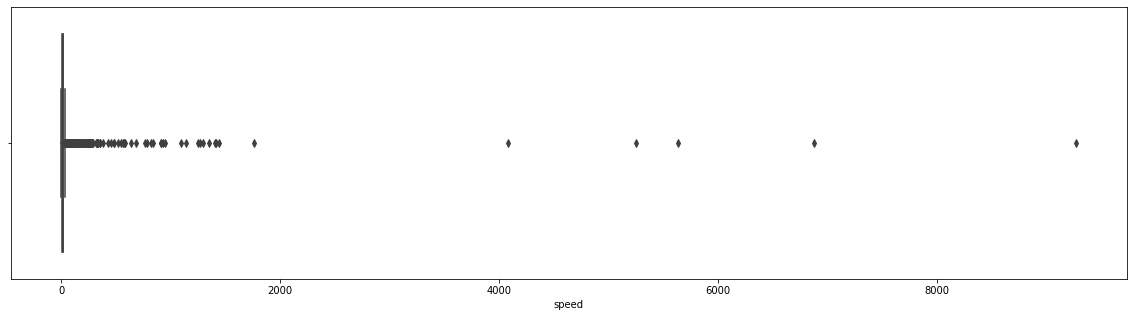

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize = (20,5))
sns.boxplot(df.speed)
plt.show()

Many trips were done at a speed of over 200 kmph. Going SuperSonic..!!

Let's remove them and focus on the trips which were done at less than 104kmph as per the speed limits

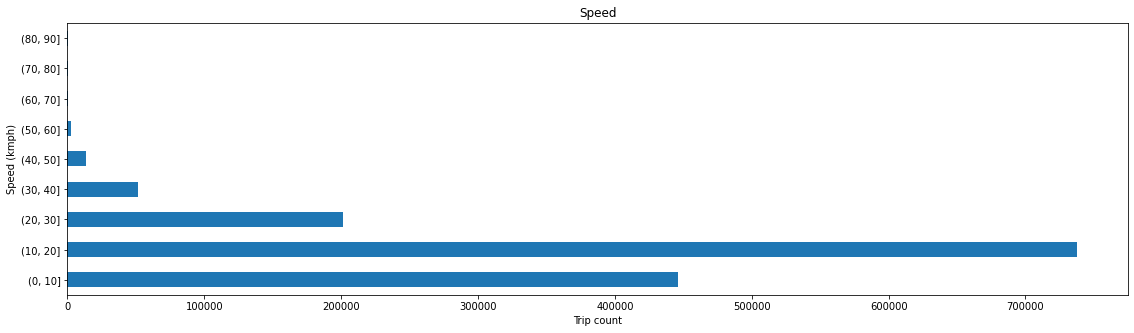

In [ ]:
df = df[df.speed <= 104]
df.speed.groupby(pd.cut(df.speed, np.arange(0,100,10))).count().plot(kind = 'barh',figsize = (19,5))
plt.xlabel('Trip count')
plt.ylabel('Speed (kmph)')
plt.title('Speed')
plt.show()

Trips over 30 kmph are being considered as outliers but we cannot ignore them because they are well under the highest speed limit of 104 kmph on state controlled highways.

Mostly trips are done at a speed range of 10-20kmph.

##### 1. Why did you pick the specific chart?

It is a suitable choice for showing the distribution of a categorical variable, in this case the speed ranges of a vehicle.

Bar plots are often used to compare the values of different categories, and the horizontal orientation in this case makes it easier to compare the trip counts for each speed range. Additionally, the use of a bar plot helps to visualize the distribution of the speeds, making it easier to see how many trips fall into each speed range.

##### 2. What is/are the insight(s) found from the chart?

It is evident from this graph what we thought off i.e. most of the trips were done at a speed range of 10-20 kmph.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If there are any trips with abnormally high speeds, this could indicate a potential issue with the data or an error in recording the speed. This information could help to improve the accuracy of the data used for the prediction model.

The speed distribution could give an idea of the average speed of vehicles in different regions or at different times of day, which could be useful in making predictions about trip times.

#### Chart - 7 Trips Per Hour (Bivariate Analysis)

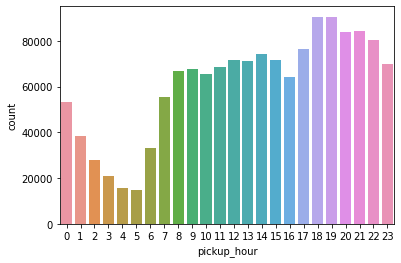

In [ ]:
# Chart - 7 visualization code
sns.countplot(df.pickup_hour)
plt.show()

##### 1. Why did you pick the specific chart?

Count plots, also known as bar plots, are often used to compare the frequency or count of occurrences for different categories. In this case, the categories are the hours of the day, and the count plot shows the number of trips taken during each hour.

##### 2. What is/are the insight(s) found from the chart?

The plot reveals that the hours with the highest number of trips are the 18th and 19th hours of the day.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the hourly distribution of trips can help the business optimize its fleet deployment. For example, if there is a high demand for taxis during the 18th and 19th hours of the day, the business can allocate more vehicles during these hours to meet the demand.

#### Chart - 8 Trips Per weekday (Bivariate Analysis)

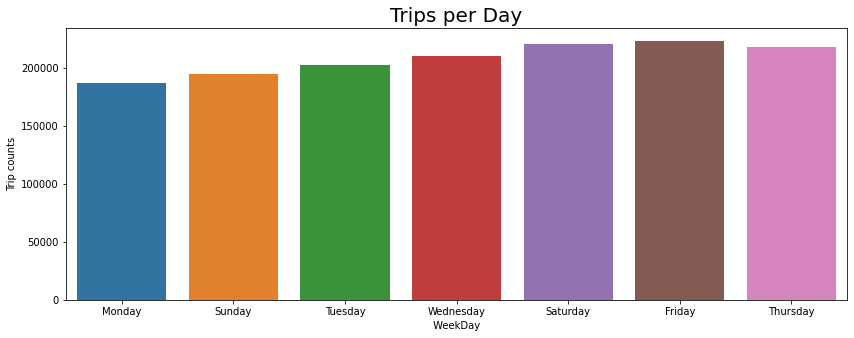

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize = (14,5))
sns.countplot(df.weekday)
plt.xlabel(' WeekDay ')
plt.ylabel('Trip counts')
plt.title('Trips per Day',fontsize = 20)
plt.show()

##### 1. Why did you pick the specific chart?

The use of a count plot helps to visualize the distribution of the trips over different days of the week, making it easier to see which days are the busiest and which days have fewer trips. This information can be useful for understanding the patterns of demand for the taxi service and for making predictions about future trip times.

##### 2. What is/are the insight(s) found from the chart?

From this chart, it is clear that there is a rising trend in taxi pickups starting from Monday and continuing through Friday. On the weekends, the trend starts to decline, which is typical as people who typically go to work during the week may prefer to stay home for rest on the weekends.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If the company knows that there is a higher demand for taxis on certain days of the week, it can schedule more drivers and vehicles to be available on those days. This could lead to a better customer experience, as there will be fewer instances of passengers having to wait for long periods of time to get a taxi.

#### Chart - 9 Trips Per Month (Bivariate Analysis)

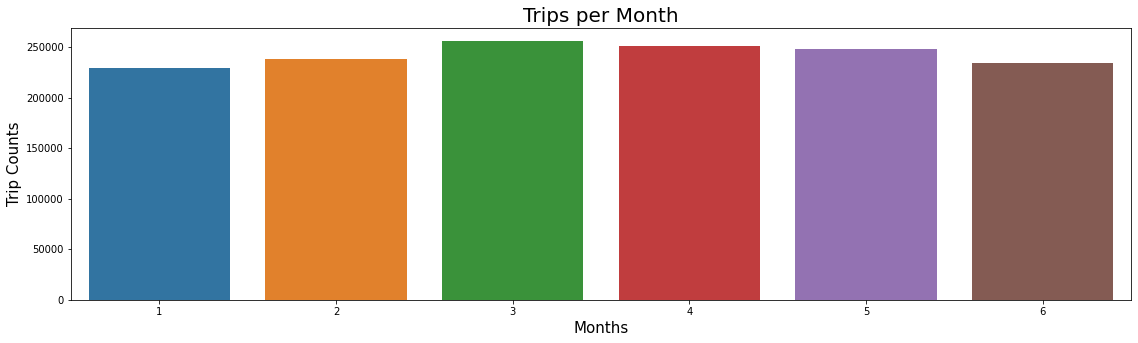

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize = (19,5))
sns.countplot(df.month)
plt.ylabel('Trip Counts',fontsize = 15)
plt.xlabel('Months',fontsize = 15)
plt.title('Trips per Month',fontsize = 20)
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart was picked to visualize the distribution of trips made per month. A bar graph is an effective way to compare the number of trips made in different months and to see the overall trend. By using a bar graph, it is easier to identify which months have higher or lower demand for the taxi service.

##### 2. What is/are the insight(s) found from the chart?

From the chart, it appears that the number of trips made in each month is relatively consistent, with a range of approximately 200,000 to 250,000 trips per month. This information could suggest that demand for the taxi service is relatively stable throughout the year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is no apparent insight that would lead to negative growth in this chart.

#### Chart - 10 Trip Duration per hour (Bivariate Analysis)

We need to aggregate the total trip duration to plot it agaist the month. The aggregation measure can be anything like sum, mean, median or mode for the duration. Since we already did the outlier analysis, so we can take the mean to visualize the pattern which should not result in the bias of the general trend.

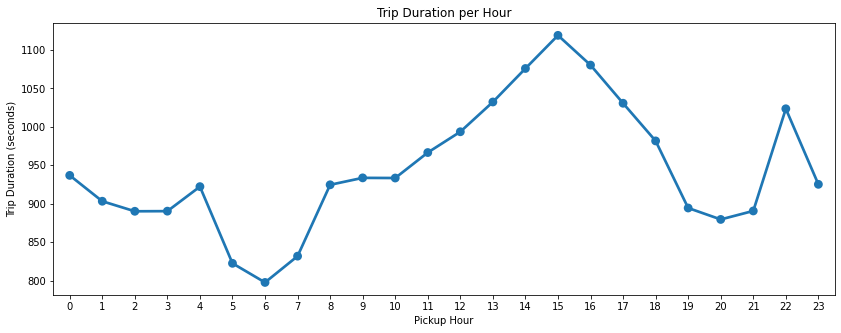

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize = (14,5))
group1 = df.groupby('pickup_hour').trip_duration.mean()
sns.pointplot(group1.index, group1.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Pickup Hour')
plt.title('Trip Duration per Hour')
plt.show()

##### 1. Why did you pick the specific chart?

This chart was picked to visualize the average trip duration across different hours of the day. By plotting the average trip duration per hour, it's possible to identify any patterns or trends in the duration of trips over time.

##### 2. What is/are the insight(s) found from the chart?

The average trip duration is shortest at 6 AM when road traffic is minimal. During peak hours, around 3 PM, the average trip duration tends to be longer. On the other hand, the average trip duration remains relatively consistent during the early morning hours before 6 AM and the late evening hours after 6 PM.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights can also be used to optimize routes, reducing the total time spent on the road and increasing the number of trips that can be completed in a given day.

#### Chart - 11 Trip duration per WeekDay (Bivariate Analysis)

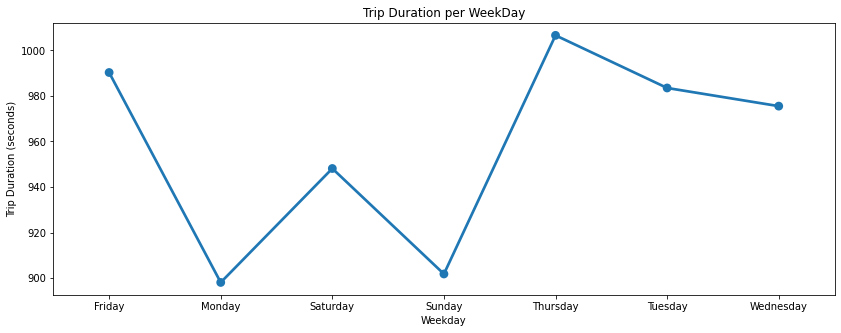

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize = (14,5))
group2 = df.groupby('weekday').trip_duration.mean()
sns.pointplot(group2.index, group2.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Weekday')
plt.title('Trip Duration per WeekDay')
plt.show()

##### 1. Why did you pick the specific chart?

I picked this chart because it shows the mean trip duration for each day of the week. This helps in understanding how the trip duration changes based on the day of the week, and if there is any specific day where the trip duration is particularly higher or lower compared to other days.

##### 2. What is/are the insight(s) found from the chart?

The graph shows that the average trip duration increases from Monday to Thursday and then decreases until Sunday.

The trip duration is roughly the same throughout the week, with small variations in the range of 0-1000 seconds. Thursday appears to have the longest trip duration compared to the other days.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

They can schedule more drivers during the weekdays when the trip duration is increasing to meet the demand, which can result in higher customer satisfaction and revenue. On the other hand, there are no insights that lead to negative growth in this chart.

#### Chart - 12 Trip duration per Month (Bivariate Analysis)

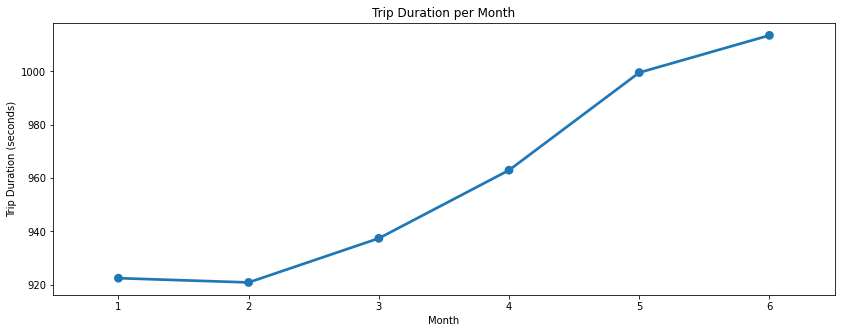

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize = (14,5))
group3 = df.groupby('month').trip_duration.mean()
sns.pointplot(group3.index, group3.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Month')
plt.title('Trip Duration per Month')
plt.show()

##### 1. Why did you pick the specific chart?

The chart was picked to visualize the average trip duration for each month. This helps to understand if there are any patterns or trends in the trip duration based on the time of the year.

##### 2. What is/are the insight(s) found from the chart?


We can see an increasing trend in the average trip duration along with each subsequent month.

The duration difference between each month is not much. It has increased gradually over a period of 6 months.

It is lowest during february when winters starts declining.

There might be some seasonal parameters like wind/rain which can be a factor of this gradual increase in trip duration over a period. Like May is generally the considered as the wettest month in NYC and which is inline with our visualization. As it generally takes longer on the roads due to traffic jams during rainy season. So natually the trip duration would increase towards April May and June.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from the chart can potentially help create a positive business impact by providing an understanding of the average trip duration across different months. This information can help the business to optimize the resources and improve the services during the months with the highest trip duration

#### Chart - 13 Trip duration per vendor (Bivariate Analysis)

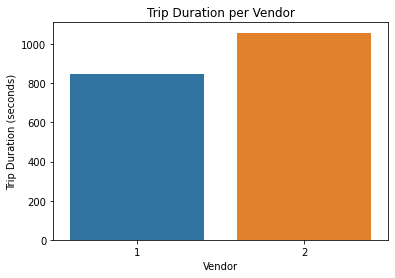

In [ ]:
# Chart - 13 visualization code
group4 = df.groupby('vendor_id').trip_duration.mean()
sns.barplot(group4.index, group4.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Vendor')
plt.title('Trip Duration per Vendor')
plt.show()

##### 1. Why did you pick the specific chart?

 In this case, I want to compare the average trip duration of each vendor and see which vendor has the shortest or longest trip duration. The bar plot provides an easy-to-read and clear representation of the data, making it easier to identify trends and patterns.

##### 2. What is/are the insight(s) found from the chart?

Vendor 2 takes the crown. Average trip duration for vendor 2 is higher than vendor 1 by a quite low margin(200 seconds).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The comparison of the average trip duration of the two vendors can help the business understand which vendor provides more efficient and faster services to customers, leading to a positive impact.

#### Chart - 14 Distance per hour (Bivariate Analysis)

Now, let us check how the distance is distributed against different variables. We know that trip distance must be more or less proportional to the trip duration if we ignore general traffic and other stuff on the road. Let's visualize this for each hour now.

Since we have already done the outlier analysis for this variable as well. We can take the mean as aggregate measure for our visualizations.

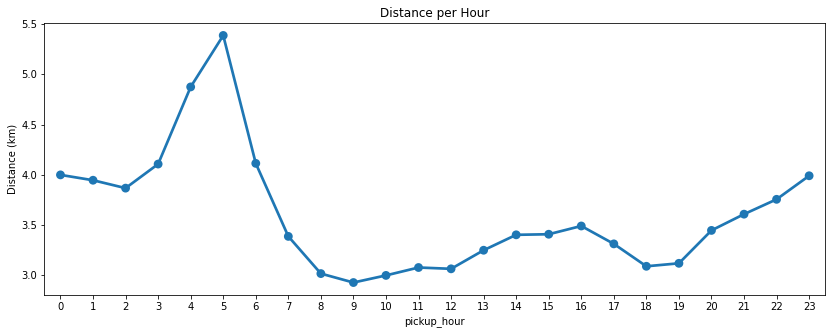

In [ ]:
# Chart - 14 visualization code
plt.figure(figsize = (14,5))
group5 = df.groupby('pickup_hour').distance.mean()
sns.pointplot(group5.index, group5.values)
plt.ylabel('Distance (km)')
plt.title('Distance per Hour')
plt.show()

##### 1. Why did you pick the specific chart?

The chart shows the average distance of the taxi trips during different hours of the day. The chart is created to understand the relationship between the hour of the day and the average distance of the trips. The y-axis represents the average distance in kilometers, while the x-axis represents the hour of the day. The pointplot is used to show the average value at each hour.

##### 2. What is/are the insight(s) found from the chart?

Trip distance is highest during early morning hours which can account for some things like:

Outstation trips taken during the weekends.

Longer trips towards the city airport which is located in the outskirts of the city.

Trip distance is fairly equal from morning till the evening varying around 3 - 3.5 km.

It starts increasing gradually towards the late night hours starting from evening till 5 AM and decrease steeply towards morning.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from this chart could potentially help create a positive business impact, for example, by providing insights into when demand for longer trips is higher, and by providing information on when to allocate more resources to these types of trips. On the other hand, if the business operates in a city where trips are mostly short and the demand for longer trips is low, the insights from this chart could lead to negative growth if the business allocates too many resources towards these types of trips.

#### Chart - 15 Distance per WeekDay (Bivariate Analysis)

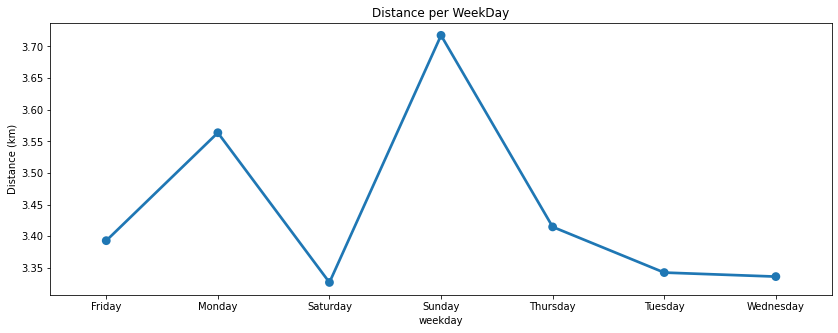

In [ ]:
# Chart - 15 visualization code
plt.figure(figsize = (14,5))
group6 = df.groupby('weekday').distance.mean()
sns.pointplot(group6.index, group6.values)
plt.ylabel('Distance (km)')
plt.title('Distance per WeekDay')
plt.show()

##### 1. Why did you pick the specific chart?

The chart was picked to visualize the average distance traveled by taxis on each day of the week. This information can provide valuable insights into the trends in travel demand for each day and can inform operational decisions, such as the deployment of vehicles and staffing levels. Additionally, it can provide a general overview of the distribution of the distance traveled over the week, allowing stakeholders to identify patterns and make predictions about future demand.

##### 2. What is/are the insight(s) found from the chart?

The average distance metric is fairly evenly distributed with values ranging around 3.5 km. It is observed that the highest average distance is recorded on Sundays, which could be due to out-of-town trips or night trips to the airport.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The information about the average distance per weekday could be useful for taxi companies to allocate their resources accordingly. For example, Sundays have a higher average distance, the company might want to ensure that there are enough taxis available to meet the demand for longer trips. This could help to prevent lost business due to unavailability of taxis during high demand times.

#### Chart - 16 Distance per Month (Bivariate Analysis)

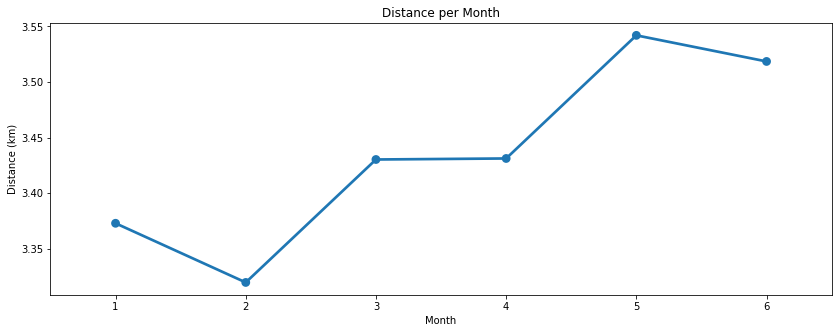

In [ ]:
# Chart - 16 visualization code
plt.figure(figsize = (14,5))
group7 = df.groupby('month').distance.mean()
sns.pointplot(group7.index, group7.values)
plt.ylabel('Distance (km)')
plt.xlabel('Month')
plt.title('Distance per Month')
plt.show()

##### 1. Why did you pick the specific chart?

I chose this specific chart to represent the data because it shows the variation of the mean distance covered per month. This allows for a clear visualization of any seasonal trends in the data, as well as for any overall patterns in the distance covered by taxis over the course of the year.

The point plot provides a clear representation of the mean value for each month, while also showing the confidence interval, which provides a sense of the variability of the data. The use of the point plot allows us to see the trends in the data over the course of a year, while also highlighting any potential outliers.

##### 2. What is/are the insight(s) found from the chart?

The average distance metric is relatively stable, fluctuating around 3.5 km, with the highest average distance observed in the 5th month and the lowest in the 2nd month.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It's difficult to determine whether the insights gained from this chart will have a positive or negative impact on business growth. On one hand, the stable average distance metric over the course of the year suggests that demand for taxi services remains relatively consistent throughout the year. This could be seen as a positive for taxi companies, as they can plan their operations accordingly.

On the other hand, the fact that the average distance fluctuates slightly over the course of the year could indicate that there are certain factors, such as seasonality or holidays, that are impacting demand for taxi services. If a taxi company were to respond to these fluctuations in demand in a proactive manner, they could potentially benefit from the changes in the market.

#### Chart - 17 Distance per Vendor (Bivariate Analysis)

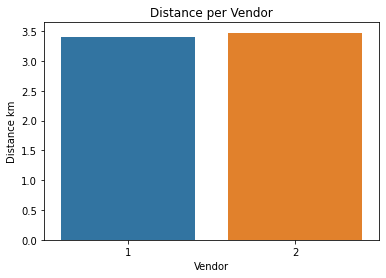

In [ ]:
# Chart - 17 visualization code
group8 = df.groupby('vendor_id').distance.mean()
sns.barplot(group8.index, group8.values)
plt.ylabel("Distance km")
plt.xlabel("Vendor")
plt.title('Distance per Vendor')
plt.show()

##### 1. Why did you pick the specific chart?

The bar plot was used to compare the average distance covered per trip by each vendor. The purpose of this visualization was to determine if there is any difference in the average distance traveled by trips of different vendors, and if so, which vendor covers more distance on average.

##### 2. What is/are the insight(s) found from the chart?

The average distance covered by both the vendors is roughly the same, with little variation. There isn't much more to be deduced from this observation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this plot are not significant in determining a positive or negative business impact. The observation that the average distance covered by both vendors is similar with little variation does not indicate any specific advantage or disadvantage for either vendor.

It could be argued that a more in-depth analysis of other factors, such as the pickup and drop-off locations, the time of day, and the passenger count, would provide more insights into the business impact. However, without further context, it is difficult to draw any meaningful conclusions from this plot alone.

#### Chart - 18 Distance v/s Trip duration (Bivariate Analysis)

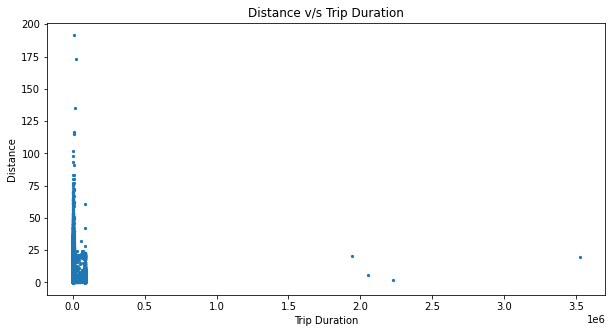

In [ ]:
# Chart - 18 visualization code
plt.figure(figsize = (10,5))
plt.scatter(df.trip_duration, df.distance , s=5, alpha=1)
plt.ylabel('Distance')
plt.xlabel('Trip Duration')
plt.title('Distance v/s Trip Duration')
plt.show()

The graph shows that there were a significant number of trips that covered very little distance but took more than 20,000 seconds in duration.

Initially, there appears to be a correlation between distance covered and trip duration, but this relationship breaks down later on.

There were also a few trips that covered a large distance of around 200km in a very short amount of time, which seems implausible and should be considered outliers.

Let's focus on the graph area where distance is < 50 kmph and duration is < 1000 seconds.

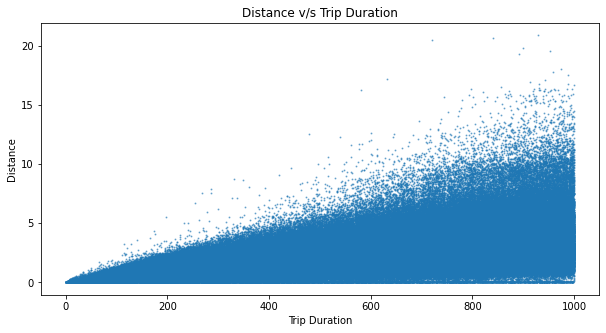

In [ ]:
plt.figure(figsize = (10,5))
dur_dist = df.loc[(df.distance < 50) & (df.trip_duration < 1000), ['distance','trip_duration']]
plt.scatter(dur_dist.trip_duration, dur_dist.distance , s=1, alpha=0.5)
plt.ylabel('Distance')
plt.xlabel('Trip Duration')
plt.title('Distance v/s Trip Duration')
plt.show()

##### 1. Why did you pick the specific chart?

I picked this specific chart because it displays the relationship between the distance covered by the trip and the trip duration. The scatter plot helps to visualize the distribution of the data points and highlight any patterns or trends that may exist between the two variables. This helps to gain insights about the relationship between distance and trip duration and whether there is any correlation between the two variables. The chart was generated after filtering the data to only include trips with a distance of less than 50 km and a trip duration of less than 1000 seconds, to eliminate any outliers that could distort the relationship between the two variables.

##### 2. What is/are the insight(s) found from the chart?

The correlation between distance covered and trip duration should have been linear, but as seen in the chart, there is a cluster of trips in the lower right corner which indicate inconsistencies in the data.

To make the data more consistent for predictive modeling, it would be appropriate to remove trips that covered no distance but lasted more than a minute.

This can be assumed that these trips were cancelled after booking and thus should not have taken more than a minute.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the correlation between distance and trip duration can help create a positive business impact by improving the accuracy of predictive models used to optimize operations and estimate costs. By removing trips that covered no distance but lasted more than a minute, the data will become more consistent and accurate, allowing for more reliable predictions and better decision making.

There are no insights that lead to negative growth in this case. On the contrary, improving the quality of the data will likely lead to improved performance and growth.

#### Chart - 19 Average speed per hour (Bivariate Analysis)

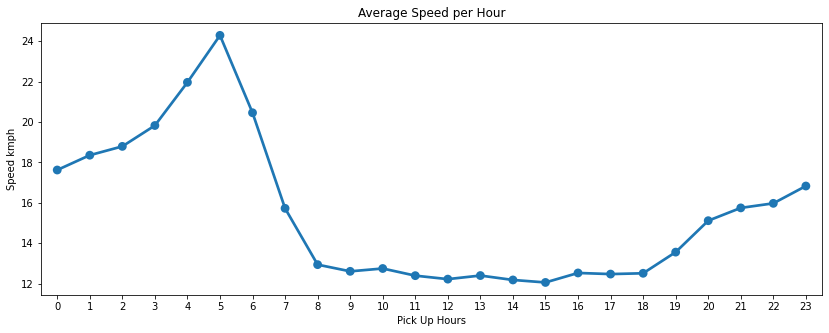

In [ ]:
# Chart - 19 visualization code
plt.figure(figsize = (14,5))
group9 = df.groupby('pickup_hour').speed.mean()
sns.pointplot(group9.index, group9.values)
plt.xlabel('Pick Up Hours')
plt.ylabel('Speed kmph')
plt.title('Average Speed per Hour')
plt.show()

##### 1. Why did you pick the specific chart?

I picked this chart because it is a pointplot, which is suitable for showing the average speed over the pickup hours of the day. The x-axis shows the pickup hours, which is a continuous variable, while the y-axis shows the average speed of the trips, which allows us to see how the average speed varies over the pickup hours.

##### 2. What is/are the insight(s) found from the chart?

The average speed follows the typical pattern observed. It rises in the late night and continues to increase steadily until the early morning. The average taxi speed peaks at 5 AM, and then drops rapidly as the morning rush hour begins. During office hours, from 8 AM to 6 PM, the average taxi speed remains relatively consistent.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight regarding the average speed of taxis can be useful for companies in various ways. For example, if a company wants to optimize its dispatch system, it can use this information to better predict the speed at which taxis are moving and adjust its dispatch algorithms accordingly. Additionally, this information can be used to improve the accuracy of estimated time of arrival (ETA) predictions for passengers.

However, there is no direct negative growth that can be attributed to this insight. It is important to note that there may be other factors that influence the speed of taxis, such as traffic congestion, weather conditions, and road construction. These factors may not be accounted for in this data and would need to be considered when using this information to make business decisions.

#### Chart - 20 Average speed per weekday  (Bivariate Analysis)


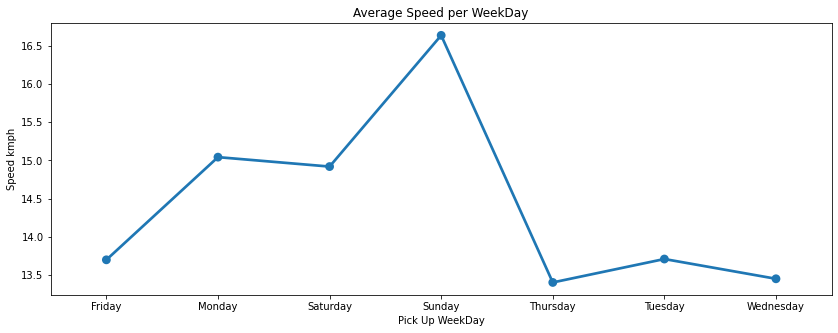

In [ ]:
# Chart - 20 visualization code
plt.figure(figsize = (14,5))
group10 = df.groupby('weekday').speed.mean()
sns.pointplot(group10.index, group10.values)
plt.xlabel('Pick Up WeekDay')
plt.ylabel('Speed kmph')
plt.title('Average Speed per WeekDay')
plt.show()

##### 1. Why did you pick the specific chart?

I picked this chart to understand the relationship between the pickup day of the week and the average speed of the trip. This information could be useful in predicting traffic patterns and in turn help plan better routes to minimize travel time, improving the overall experience for both drivers and passengers.

##### 2. What is/are the insight(s) found from the chart?

The average speed of taxis is generally higher on weekends compared to weekdays, which is expected given that there is less rush hour traffic during these days.

However, the average speed on Monday is surprisingly high, which may be due to a number of factors, such as travelers returning from out-of-town trips early in the morning before office hours or early morning travelers coming from the airport after a vacation.

Additionally, there may be other factors contributing to this pattern that are only known to locals. It's also important to note that there could be anomalies present in the dataset that are difficult to detect in such a large dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight gained from the average speed chart can potentially have a positive impact on the taxi business by informing the company of the trends in travel patterns, such as higher speeds on weekends and Mondays. This information can be used to better allocate resources, such as cars and drivers, to meet the demand.

Additionally, this information can be used to better understand the reasons behind these patterns, such as rush hour traffic or travelers returning from trips. If the company can understand the root cause, they may be able to come up with solutions to better serve the customers and increase efficiency.

#### Chart - 21 Passenger count per vendor  (Bivariate Analysis)

This time we will be analyzing the passenger count metric, which is a whole number and does not need to be a ratio like the other metrics. As such, we will plot it against the vendor only. To get a clear idea of the distribution, we will use the mean as the aggregate measure. This is because we have already performed an outlier analysis on this metric and our results will not be affected by extreme values. If we use the median, it will only return one because the majority of the trips were taken by a single passenger. Let's examine its distribution.

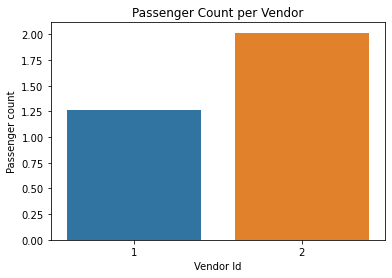

In [ ]:
# Chart - 21 visualization code
group9 = df.groupby('vendor_id').passenger_count.mean()
sns.barplot(group9.index, group9.values)
plt.ylabel('Passenger count')
plt.xlabel('Vendor Id')
plt.title('Passenger Count per Vendor')
plt.show()

##### 1. Why did you pick the specific chart?

I picked the bar plot to visualize the average passenger count per vendor. The bar plot allows us to compare the mean passenger count between the two vendors, giving us a clear understanding of which vendor is serving more passengers on average.

##### 2. What is/are the insight(s) found from the chart?

It appears that there is a clear distinction between the two providers in terms of the average passenger count in all trips. Vendor 2 trips typically have an average of 2 passengers, while vendor 1's trips usually only have 1 passenger. To get a deeper understanding, we can delve further.

It seems that Vendor 2 serves a larger share of the market, likely due to their capacity to transport more passengers in bigger vehicles, including minivans. This is demonstrated by the fact that Vendor 2 has a higher frequency of trips with more than one passenger, as opposed to Vendor 1 which primarily serves trips with a single passenger.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the analysis of the average passenger count can have a positive impact on the business. Understanding the differences in the passenger count between the two vendors can help the company make informed decisions about which vendor to use for certain types of trips. For example, if the company wants to provide transportation for a group of passengers, they would likely choose to use Vendor 2, as their vehicles can accommodate more passengers. On the other hand, if the company wants to provide transportation for an individual passenger, they would likely choose to use Vendor 1.

#### Chart - 22 Pick Up Points v/s Dropoff Points  (Bivariate Analysis)

Boroughs_Labels_New_York_City_Map.svg

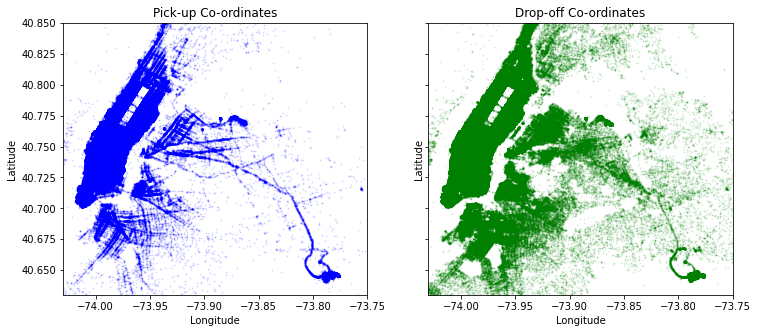

In [ ]:
# Chart - 22 visualization code
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,figsize = (12,5))
ax[0].scatter(df['pickup_longitude'].values, df['pickup_latitude'].values,
color='blue', s=1, label='train', alpha=0.1)
ax[1].scatter(df['dropoff_longitude'].values, df['dropoff_latitude'].values,
color='green', s=1, label='train', alpha=0.1)
ax[1].set_title('Drop-off Co-ordinates')
ax[0].set_title('Pick-up Co-ordinates')
ax[0].set_ylabel('Latitude')
ax[0].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')
ax[1].set_xlabel('Longitude')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

##### 1. Why did you pick the specific chart?

Picked this specific chart to visualize the pickup and drop-off coordinates of the taxi trips in the dataset. The chart shows the latitude and longitude coordinates on the x and y axis, respectively. The chart is useful for understanding the geographical distribution of the pickup and drop-off points, which can provide insights into the transportation patterns and trends in the city. Additionally, the chart is a scatter plot, which allows us to see the density of the pickup and drop-off points and detect any anomalies or outliers.

##### 2. What is/are the insight(s) found from the chart?

The pickup plot shows that the majority of the pickups are concentrated in the Manhattan area, indicating that it is a highly populated area for pick ups. In contrast, the drop-off locations are more spread out, with a wider distribution. The average distance of the trips, which was previously determined to be 3.5 km, can explain why the drop-offs are mostly located in Manhattan itself.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact by providing a better understanding of the taxi service usage patterns. For example, the information on the peak hours of service usage and the popular pickup and drop-off locations can help the company optimize their resources, such as deploying more taxis in high demand areas during peak hours. This can lead to increased efficiency, better customer service, and ultimately, improved profitability.

#### Chart - 23 - Correlation Heatmap  (Multivariate Analysis)

In [ ]:
# Correlation Heatmap visualization code
df.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,weekday_num,month,pickup_hour,pickup_minute,distance,speed
vendor_id,1.00,0.29,0.01,0.00,0.00,0.00,0.02,0.00,-0.01,0.01,-0.00,0.01,0.00
passenger_count,0.29,1.00,0.00,-0.00,-0.00,-0.00,0.01,0.03,-0.00,0.01,0.00,0.01,-0.00
pickup_longitude,0.01,0.00,1.00,0.02,0.79,0.10,0.03,-0.02,0.00,0.01,-0.00,0.28,0.16
pickup_latitude,0.00,-0.00,0.02,1.00,0.12,0.50,-0.03,-0.03,-0.00,0.01,0.00,-0.29,-0.11
dropoff_longitude,0.00,-0.00,0.79,0.12,1.00,0.15,0.02,-0.00,0.00,-0.02,-0.00,0.19,0.15
dropoff_latitude,0.00,-0.00,0.10,0.50,0.15,1.00,-0.02,-0.02,-0.00,0.01,0.00,-0.15,0.02
trip_duration,0.02,0.01,0.03,-0.03,0.02,-0.02,1.00,-0.00,0.01,0.00,-0.00,0.10,-0.03
weekday_num,0.00,0.03,-0.02,-0.03,-0.00,-0.02,-0.00,1.00,-0.01,-0.08,0.00,0.01,0.07
month,-0.01,-0.00,0.00,-0.00,0.00,-0.00,0.01,-0.01,1.00,-0.00,-0.00,0.02,-0.03
pickup_hour,0.01,0.01,0.01,0.01,-0.02,0.01,0.00,-0.08,-0.00,1.00,-0.00,-0.02,-0.10


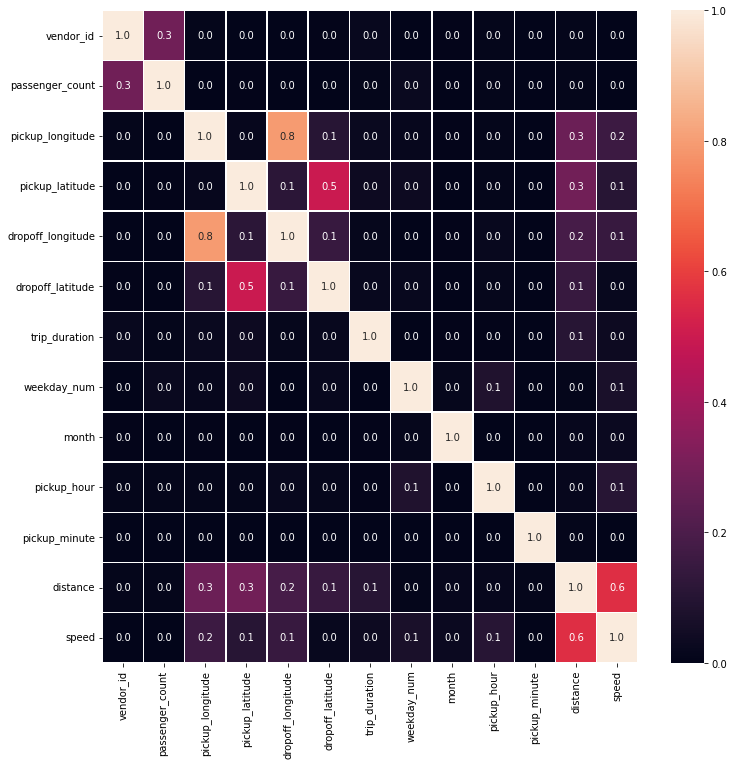

In [ ]:
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(abs(round(df.corr(),3)), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

##### 1. Why did you pick the specific chart?

The heatmap was picked because it provides a quick visual representation of the correlation between different variables in the dataset. Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate together.

The heatmap makes it easy to see the strength and direction of the relationship between the different variables, and can help identify which variables are highly correlated with each other and which are not.

##### 2. What is/are the insight(s) found from the chart?

Passenger count and vendor ID has positive correaltion of 30%.

Dropoff longitude and pickup longitude has strong positive correlation of 80%.

Dropoff latitude and pickup latitude has moderate positive correaltion of 50%.

Trip duration and pickup longitude has weak correlation of 3%.

Trip duration and pickup latitude has weak negative correlation of 3%.

Distance and pickup longitude has weak correlation of 30%.

Speed has weak correaltion of 10-20% with both pickup and droppoff longitude.

Speed and distance has strong positive correaltion of 60%.

Trip duration is positively correlated with distance with 10% of correlation.